# TP1 &ndash; Géolocalisation

Indiquez ici les noms des coéquipiers :

- <span style="color:blue">GCH</span>

Perdus que vous étiez dans vos réflexions multidimensionnelles, vous réalisez subitement que vous êtes perdus et que vous ne savez plus où vous vous trouvez à la surface du globe... Heureusement, vous aviez eu la présence d'esprit d'avoir sur vous un récepteur GPS accompagné de son manuel utilisateur `gps.pdf` ainsi que votre PC équipé de SageMath.

Évidemment, vous commencez par lire le manuel.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

















Si si, vraiment, lisez-le !

## A) Mise en bouche

Deux sphères sécantes s'intersectent en un cercle... Afin de mieux visualiser la situation, réalisez une fonction prenant en argument deux centres et deux rayons et affichant les sphères correspondantes ainsi que le cercle d'intersection.

Piste pour ce dernier : fabriquer un repère orthonormé dans le plan contenant l'intersection des sphères puis utiliser `parametric_plot3d`.

Exemple de rendu :

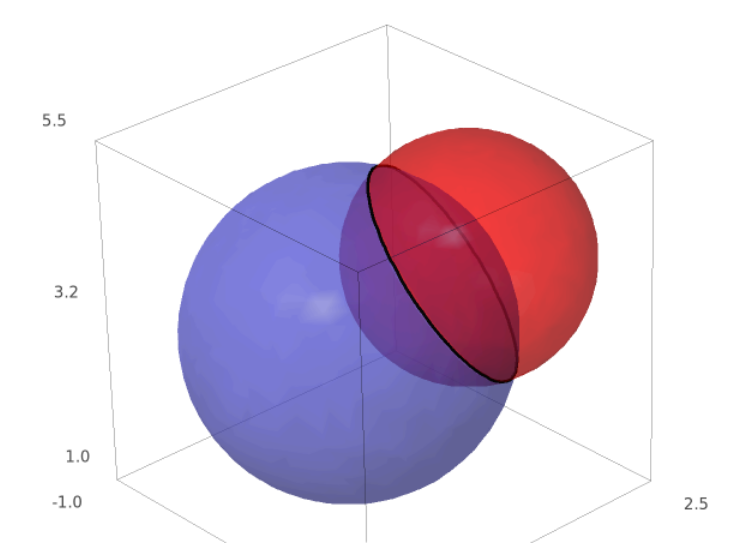

<div style="color:blue">S'il est facile d'afficher les deux sphères et de regarder à peu près comment elles s'intersectent, il est un peu plus délicat de tracer précisément le cercle d'intersection : le mieux est de d'en donner une paramétrisation.
    
Considérons donc deux sphères de centres $P_1$, $P_2$ $\in \mathbb{R}^3$ et rayons $r_1$, $r_2$ $\in \mathbb{R}_{>0}$ : ces sphères s'intersectent en un cercle $\mathcal{C}$ de centre $C$ lorsque $r_1 + r_2 > || \overrightarrow{P_1P_2} ||$.
    
Si $(\mathbf{u}, \mathbf{v})$ est une base orthonormée du plan $\mathcal{P}$ contenant $\mathcal{C}$, celui-ci peut être décrit paramétriquement par
$$ C + r \, ( \cos \theta) \, \mathbf{u} + r \, (\sin \theta) \, \mathbf{v} \qquad (0 \leq \theta \leq 2 \pi). $$
    
Ne reste plus qu'à déterminer $C$, $r$ ainsi que des vecteurs $\mathbf{u}$, $\mathbf{v}$ appropriés.
    
Si on développe les équations des sphères
$$ \begin{cases} || X - P_1 ||^2 = r_1^2 \\ || X - P_2 ||^2 = r_2^2 \end{cases} $$
on obtient
$$ \begin{cases} ||X||^2 - 2 \, X \bullet P_1 + ||P_1||^2 = r_1^2 \\ ||X||^2 - 2 \, X \bullet P_2 + ||P_2||^2 = r_2^2. \end{cases} $$
    
En soustrayant les deux, on a
$$ 2 \, X \bullet \overrightarrow{P_1P_2} + ||P_1||^2 - ||P_2||^2 = r_1^2 - r_2^2, $$
c'est une équation du plan $\mathcal{P}$ contenant le cercle d'intersection $\mathcal{C}$. Le centre $C$ du cercle appartient à ce plan et est situé sur la droite allant de $P_1$ à $P_2$ ; en écrivant $C = P_1 + \lambda \, \overrightarrow{P_1P_2}$ et le fait que $C \in \mathcal{P}$, on trouve
$$ \lambda = \frac{||\overrightarrow{P_1P_2}||^2 + r_1^2 -r_2^2}{2 ||\overrightarrow{P_1P_2}||^2 }. $$
    
En considérant un triangle rectangle de base $P_1 C$, hauteur $r$ et hypothénuse $r_1$ on obtient alors une expression pour $r$ (qui ne se simplifie pas spécialement bien) :
$$ r = \sqrt{ r_1^2 - ||\overrightarrow{P_1C}||^2 } = \sqrt{ r_1^2 - \lambda^2 ||\overrightarrow{P_1P_2}||^2 }. $$ </div>

In [4]:
def intersection_circle(P1, r1, P2, r2):
    
    P1 = vector(P1)
    P2 = vector(P2)
    
    n = P2 - P1
    d = n.norm()
    l = (d^2 + r1^2 - r2^2)/(2*d^2)
    r = sqrt(r1^2 - l^2*d^2)
    
    C = P1 + l*n
    
    u = n.cross_product(vector((1.,0,0)))
    u = u/u.norm()
    v = n.cross_product(u)
    v = v/v.norm()
    
    return parametric_plot3d( C + r*u*cos(x) + r*v*sin(x), (x,0,2*pi), color="black", thickness=5 )

In [5]:
def sphere_intersection(P1,r1,P2,r2) :
    
    S1 = sphere(P1,r1,color="blue",opacity=0.5)
    S2 = sphere(P2,r2,color="red",opacity=0.5)
    
    return S1 + S2 + intersection_circle(P1,r1,P2,r2)

<div style="color:blue">Exemple :</div>

In [6]:
P1 = (0,0,0)
P2 = (1,-2,3)
r1 = 3
r2 = 2
sphere_intersection(P1,r1,P2,r2)

Graphics3d Object